<a href="https://colab.research.google.com/github/SunnyDahitJ/NNDL/blob/main/NNDL_practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import exp
from random import seed
from random import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class BPN:
  def __init__(self, train_data, test_data, n_hidden, l_rate, n_epochs):
    self.train_data = train_data
    self.test_data = test_data
    self.n_hidden = n_hidden
    self.l_rate = l_rate
    self.n_epochs = n_epochs
    self.network = list()

  # Initialize a network
  def initialize_network(self):
    n_inputs = len(self.train_data[0]) - 1
    n_outputs = len(set([row[-1] for row in self.train_data]))

    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(self.n_hidden)]
    self.network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(self.n_hidden + 1)]} for i in range(n_outputs)]
    self.network.append(output_layer)

  def activate(self, weights, inputs):
    activation = weights[-1]

    for i in range(len(weights)-1):
      activation += weights[i] * inputs[i]
    return activation

  def transfer(self, activation):
    return 1.0 / (1.0 + exp(-activation))

  def forward_propagate(self, row):
    inputs = row
    for layer in self.network:
      new_inputs = []
      for neuron in layer:
        activation = self.activate(neuron['weights'], inputs)
        neuron['output'] = self.transfer(activation)
        new_inputs.append(neuron['output'])
      inputs = new_inputs
    return inputs

  def transfer_derivative(self, output):
    return output * (1.0 - output)

  def backward_propagate_error(self, expected):
    for i in reversed(range(len(self.network))):
      layer = self.network[i]
      errors = list()
      if i != len(self.network)-1:
        for j in range(len(layer)):
          error = 0.0
          for neuron in self.network[i + 1]:
            error += (neuron['weights'][j] * neuron['delta'])
          errors.append(error)
      else:
        for j in range(len(layer)):
          neuron = layer[j]
          errors.append(neuron['output'] - expected[j])
      for j in range(len(layer)):
        neuron = layer[j]
        neuron['delta'] = errors[j] * self.transfer_derivative(neuron['output'])

  def update_weights(self, row):
    for i in range(len(self.network)):
      inputs = row[:-1]
      if i != 0:
        inputs = [neuron['output'] for neuron in self.network[i - 1]]
      for neuron in self.network[i]:
        for j in range(len(inputs)):
          neuron['weights'][j] -= self.l_rate * neuron['delta'] * inputs[j]
        neuron['weights'][-1] -= self.l_rate * neuron['delta']

  def train_network(self):
    self.initialize_network()
    n_outputs = len(set([row[-1] for row in self.train_data]))
    # print(n_outputs)

    for epoch in range(self.n_epochs):
      sum_error = 0
      for row in self.train_data:
        outputs = self.forward_propagate(row)
        expected = [0 for i in range(n_outputs)]
        expected[int(row[-1])] = 1
        sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
        self.backward_propagate_error(expected)
        self.update_weights(row)
      print('>epoch=%d, lrate=%.3f, MSE=%f' % (epoch + 1, self.l_rate, sum_error / len(self.train_data)))

  def predict(self, row):
    outputs = self.forward_propagate(row)
    return outputs.index(max(outputs))
  
  def show_predictions(self):
    self.y_pred = []
    for row in self.test_data:
      prediction = self.predict(row)
      self.y_pred.append(prediction)
      prefix = '+' if row[-1] == prediction else '-'
      print('%s Expected=%d, Got=%d' % (prefix, row[-1], prediction))
  
  def get_accuracy_score(self):
    score = 0
    self.y_pred = []
    for row in self.test_data:
      prediction = self.predict(row)
      self.y_pred.append(prediction)
      score += 1 if row[-1] == prediction else 0
    return (score / len(test)) * 100
    # print(f"Accuracy score: { ((score / len(test)) * 100) }")

In [ ]:
df = pd.read_csv("iris_dataset.csv")
df.Species = pd.Series(LabelEncoder().fit_transform(df.Species))
df_array = df.iloc[:, 1:].to_numpy()
df_array

In [ ]:
seed(1)
df = pd.read_csv("iris_dataset.csv")
df.Species = pd.Series(LabelEncoder().fit_transform(df.Species))
df_array = df.iloc[:, 1:].to_numpy()
df_array

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [ ]:
np.random.shuffle(df_array)
print(df_array)

[[6.3 2.5 4.9 1.5 1. ]
 [5.8 2.7 3.9 1.2 1. ]
 [5.7 3.8 1.7 0.3 0. ]
 [6.5 2.8 4.6 1.5 1. ]
 [6.8 3.2 5.9 2.3 2. ]
 [6.7 3.3 5.7 2.1 2. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [7.7 2.6 6.9 2.3 2. ]
 [6.7 3.1 5.6 2.4 2. ]
 [5.4 3.4 1.5 0.4 0. ]
 [6.2 2.8 4.8 1.8 2. ]
 [6.1 2.8 4.  1.3 1. ]
 [5.2 2.7 3.9 1.4 1. ]
 [5.7 2.9 4.2 1.3 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [5.4 3.9 1.7 0.4 0. ]
 [6.7 3.1 4.4 1.4 1. ]
 [6.7 3.  5.  1.7 1. ]
 [5.1 3.8 1.9 0.4 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [6.5 3.  5.5 1.8 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [5.  3.  1.6 0.2 0. ]
 [6.9 3.1 5.1 2.3 2. ]
 [6.3 3.3 4.7 1.6 1. ]
 [6.4 2.8 5.6 2.2 2. ]
 [6.6 3.  4.4 1.4 1. ]
 [7.7 3.  6.1 2.3 2. ]
 [5.5 2.4 3.8 1.1 1. ]
 [5.1 3.8 1.5 0.3 0. ]
 [4.9 2.5 4.5 1.7 2. ]
 [6.2 3.4 5.4 2.3 2. ]
 [4.9 3.  1.4 0.2 0. ]
 [5.5 2.3 4.  1.3 1. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [5.1 2.5 3.  1.1 1. ]
 [6.4 3.1 5.5 1.8 2. ]
 [7.6 3.  6.6 2.1 2. ]
 [6.4 2.9 4.3 1.3 1. ]
 [6.1 2.9 4.7 1.4 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [5.  3.3 1

In [ ]:
train = df_array[:105]
test = df_array[105:]
print(len(train), len(test))

105 45


In [ ]:
# actually using bpn

bpn = BPN(train, test, 2, 0.1, 200)
bpn.train_network()

>epoch=1, lrate=0.100, MSE=1.046115
>epoch=2, lrate=0.100, MSE=0.692773
>epoch=3, lrate=0.100, MSE=0.675856
>epoch=4, lrate=0.100, MSE=0.675125
>epoch=5, lrate=0.100, MSE=0.675048
>epoch=6, lrate=0.100, MSE=0.675024
>epoch=7, lrate=0.100, MSE=0.675007
>epoch=8, lrate=0.100, MSE=0.674992
>epoch=9, lrate=0.100, MSE=0.674976
>epoch=10, lrate=0.100, MSE=0.674961
>epoch=11, lrate=0.100, MSE=0.674946
>epoch=12, lrate=0.100, MSE=0.674930
>epoch=13, lrate=0.100, MSE=0.674914
>epoch=14, lrate=0.100, MSE=0.674898
>epoch=15, lrate=0.100, MSE=0.674880
>epoch=16, lrate=0.100, MSE=0.674862
>epoch=17, lrate=0.100, MSE=0.674842
>epoch=18, lrate=0.100, MSE=0.674820
>epoch=19, lrate=0.100, MSE=0.674797
>epoch=20, lrate=0.100, MSE=0.674771
>epoch=21, lrate=0.100, MSE=0.674741
>epoch=22, lrate=0.100, MSE=0.674708
>epoch=23, lrate=0.100, MSE=0.674670
>epoch=24, lrate=0.100, MSE=0.674624
>epoch=25, lrate=0.100, MSE=0.674570
>epoch=26, lrate=0.100, MSE=0.674503
>epoch=27, lrate=0.100, MSE=0.674418
>epoch=28,

In [ ]:
bpn.show_predictions()

+ Expected=1, Got=1
- Expected=1, Got=2
+ Expected=2, Got=2
+ Expected=2, Got=2
- Expected=1, Got=2
+ Expected=1, Got=1
+ Expected=1, Got=1
+ Expected=0, Got=0
+ Expected=0, Got=0
+ Expected=0, Got=0
+ Expected=0, Got=0
- Expected=1, Got=2
+ Expected=2, Got=2
- Expected=1, Got=2
+ Expected=0, Got=0
+ Expected=0, Got=0
+ Expected=0, Got=0
+ Expected=2, Got=2
+ Expected=2, Got=2
+ Expected=2, Got=2
+ Expected=2, Got=2
+ Expected=0, Got=0
+ Expected=2, Got=2
+ Expected=2, Got=2
- Expected=1, Got=2
+ Expected=2, Got=2
+ Expected=0, Got=0
+ Expected=1, Got=1
- Expected=1, Got=2
+ Expected=0, Got=0
+ Expected=2, Got=2
- Expected=1, Got=2
+ Expected=1, Got=1
+ Expected=2, Got=2
+ Expected=0, Got=0
+ Expected=1, Got=1
- Expected=1, Got=2
+ Expected=1, Got=1
+ Expected=2, Got=2
- Expected=1, Got=2
+ Expected=2, Got=2
+ Expected=0, Got=0
+ Expected=2, Got=2
+ Expected=0, Got=0
+ Expected=1, Got=1


In [ ]:
bpn.get_accuracy_score()

80.0

In [ ]:
class RBF:
    def __init__(self, X, y, tX, ty, num_of_classes, k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def get_distance(self, x1, x2):
      sum = 0
      for i in range(len(x1)):
          sum += (x1[i] - x2[i]) ** 2
      return np.sqrt(sum)


    def kmeans(self, max_iters):
      centroids = self.X[np.random.choice(range(len(self.X)), self.k, replace=False)]
      converged = False
      current_iter = 0

      while (not converged) and (current_iter < max_iters):
          cluster_list = [[] for i in range(len(centroids))]

          for x in self.X:  # Go through each data point
              distances_list = []
              for c in centroids:
                  distances_list.append(self.get_distance(c, x))
              cluster_list[int(np.argmin(distances_list))].append(x)

          cluster_list = list((filter(None, cluster_list)))
          prev_centroids = centroids.copy()
          centroids = []

          for j in range(len(cluster_list)):
              centroids.append(np.mean(cluster_list[j], axis=0))

          pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))
          converged = (pattern == 0)
          current_iter += 1

      return np.array(centroids), [np.std(x) for x in cluster_list]

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def rbf(self, x, c, s):
        distance = self.get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

    def fit(self):
      self.centroids, self.std_list = self.kmeans(1000)

      if not self.std_from_clusters:
          dMax = np.max([self.get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
          self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

      RBF_X = self.rbf_list(self.X, self.centroids, self.std_list)
      self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)
      RBF_list_tst = self.rbf_list(self.tX, self.centroids, self.std_list)
      
      self.pred_ty = RBF_list_tst @ self.w
      self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])
    
    def accuracy_score(self):
      diff = self.pred_ty - self.ty
      return (len(np.where(diff == 0)[0]) / len(diff)) * 100

In [ ]:
np.array([
    [1, 1], 
    [2, 0]
]) @ np.array([
    [1, 1],
    [2, 3]
])

array([[3, 4],
       [2, 2]])

In [ ]:
x = train[:, :-1]
y = train[:, -1].astype(np.int32)
x_test = test[:, :-1]
y_test = test[:, -1].astype(np.int32)

In [ ]:
rbfn = RBF(x, y, x_test, y_test, 3, 20, False)
rbfn.fit()
rbfn.accuracy_score()

93.33333333333333

In [ ]:
for i in range(len(y_test)):
  print(f"{'+' if rbfn.pred_ty[i] == int(y_test[i]) else '-'} Got: { rbfn.pred_ty[i] }, Predicted: { int(y_test[i]) }")

+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
+ Got: 1, Predicted: 1
- Got: 2, Predicted: 1
- Got: 2, Predicted: 0
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
- Got: 1, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
+ Got: 2, Predicted: 2
+ Got: 0, P

In [ ]:
svm_rbf = SVC(kernel='rbf', probability=True, C=100, gamma=0.0001)
clf = svm_rbf.fit(x, y)
y_pred_rbf = svm_rbf.predict(x_test)
rbf_accuracy = svm_rbf.score(x_test, y_test)
rbf_accuracy

0.9111111111111111

In [ ]:
for i in range(len(y_test)):
  print(f"{'+' if y_pred_rbf[i] == int(y_test[i]) else '-'} Got: { y_pred_rbf[i] }, Predicted: { int(y_test[i]) }")

+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 0, Predicted: 0
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
- Got: 1, Predicted: 2
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 0, Predicted: 0
+ Got: 2, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
+ Got: 1, Predicted: 1
- Got: 2, Predicted: 1
+ Got: 1, Predicted: 1
- Got: 1, Predicted: 2
+ Got: 1, Predicted: 1
+ Got: 2, Predicted: 2
+ Got: 0, Predicted: 0
- Got: 1, Predicted: 2
+ Got: 0, P

In [ ]:
print("Accuracy Comparison:")
print("SVM with RBF kernel:", rbf_accuracy * 100)
print("BPN:", bpn.get_accuracy_score())
print("RBFN:", rbfn.accuracy_score())

Accuracy Comparison:
SVM with RBF kernel: 91.11111111111111
BPN: 80.0
RBFN: 93.33333333333333


Text(0.5, 1.0, 'SVM with RBF Kernel Predictions')

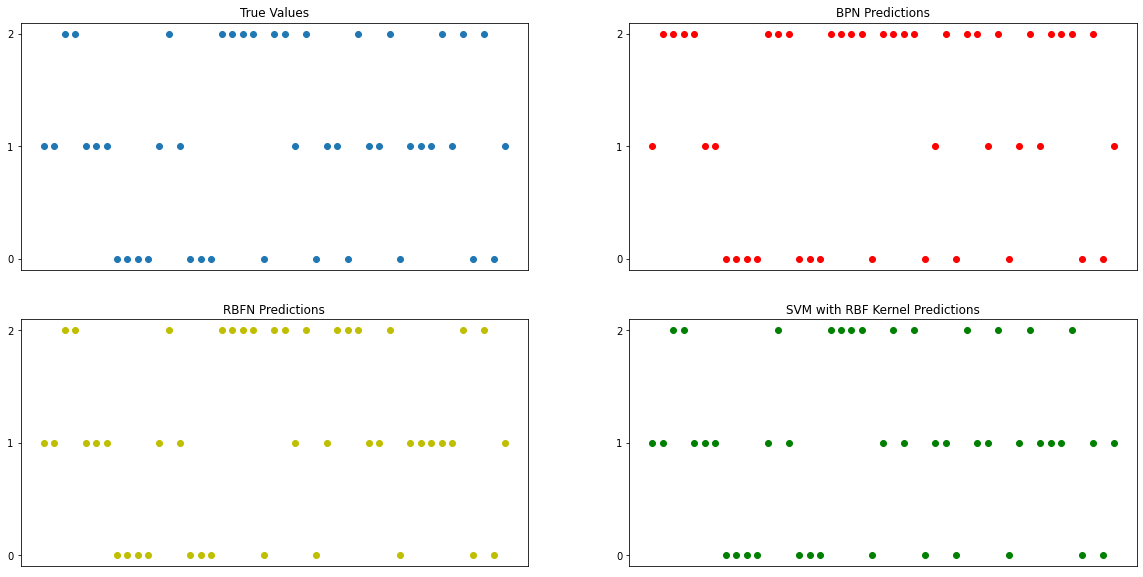

In [ ]:
x_plot = np.arange(len(y_test))

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(x_plot, y_test)
plt.yticks([0, 1, 2])
plt.xticks([])
plt.title("True Values")
plt.subplot(222)
plt.scatter(x_plot, bpn.y_pred, color="r")
plt.yticks([0, 1, 2])
plt.xticks([])
plt.title("BPN Predictions")
plt.subplot(223)
plt.scatter(x_plot, rbfn.pred_ty, color="y")
plt.yticks([0, 1, 2])
plt.xticks([])
plt.title("RBFN Predictions")
plt.subplot(224)
plt.scatter(x_plot, y_pred_rbf, color="g")
plt.yticks([0, 1, 2])
plt.xticks([])
plt.title("SVM with RBF Kernel Predictions")